# Quantum Convolution 

Test on 1D data with a Haar filter

In [1]:
from IPython.display import display, Math

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))

### Generate input state

In [2]:
import numpy as np

num_qubits = 3
num_states = 2**num_qubits

seed = 42069
np.random.seed(seed)
params = np.random.rand(num_states)
# params = [0.5, 1, 0.5, 0] 

params = params / np.linalg.norm(params)

print_matrix(params.round(3))

<IPython.core.display.Math object>

### Initialize quantum circuit

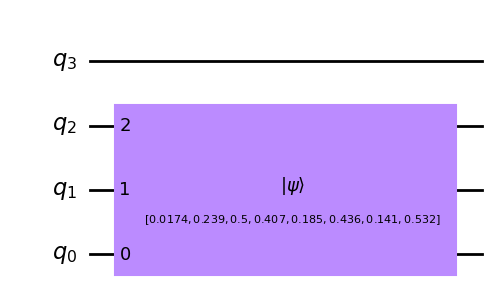

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator

qc = QuantumCircuit(num_qubits + 1)
qc.initialize(params, qc.qubits[:-1])

qc.draw('mpl', reverse_bits=True)

### Apply convolution circuit

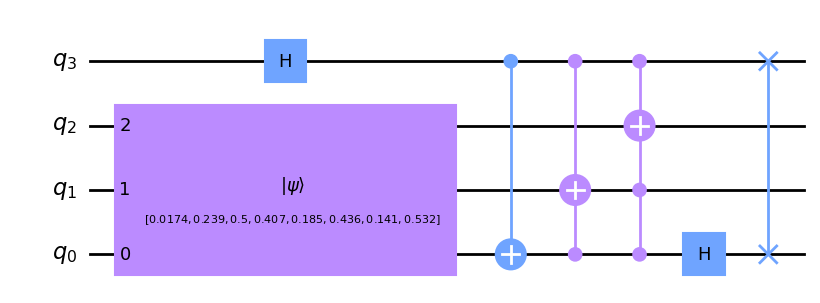

In [4]:
qc.h(num_qubits)

# Shift operation
for i in range(num_qubits):
    qc.mcx([num_qubits] + list(range(i)), i)

qc.h(0)
qc.swap(0, num_qubits)

qc.draw('mpl', reverse_bits=True)

### Get statevector

In [5]:
from qiskit.quantum_info.states import Statevector

psi = np.real_if_close(Statevector(qc).data)

print_matrix(psi.round(3))

<IPython.core.display.Math object>

### Calculate expected output

In [6]:
from itertools import zip_longest, tee

a, b = tee(params)
first = next(b, None)
lst = list(zip_longest(a, b, fillvalue=first))

psi_expected = np.array([(a+b)/2 for a, b in lst] + [(a-b)/2 for a, b in lst])

print_matrix(psi_expected.round(3))

<IPython.core.display.Math object>

### Check fidelity

In [7]:
fidelity = np.dot(psi, psi_expected)

print(f"Fidelity: {fidelity:.0%}")

Fidelity: 100%
